In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [170]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

# scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Problem 4: Logistic regression with PCA

In [171]:
loss, accuracy, precision, recall, f1, cnf_matrix = ([] for i in range(6))

for k in range(1,31):
  pca = PCA(n_components=k)
  x_pca = pca.fit_transform(x)

  np.random.seed(0)
  x_train, x_test, y_train, y_test = train_test_split(x_pca, y, train_size = 0.8, test_size = 0.2, random_state = 100)

  classifier = LogisticRegression(random_state=0)
  classifier.fit(x_train, y_train)

  y_pred = classifier.predict(x_test)
  loss.append(metrics.log_loss(y_test, y_pred))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred))
  recall.append(metrics.recall_score(y_test, y_pred))
  f1.append(metrics.f1_score(y_test, y_pred))
  cnf_matrix.append(confusion_matrix(y_test, y_pred))

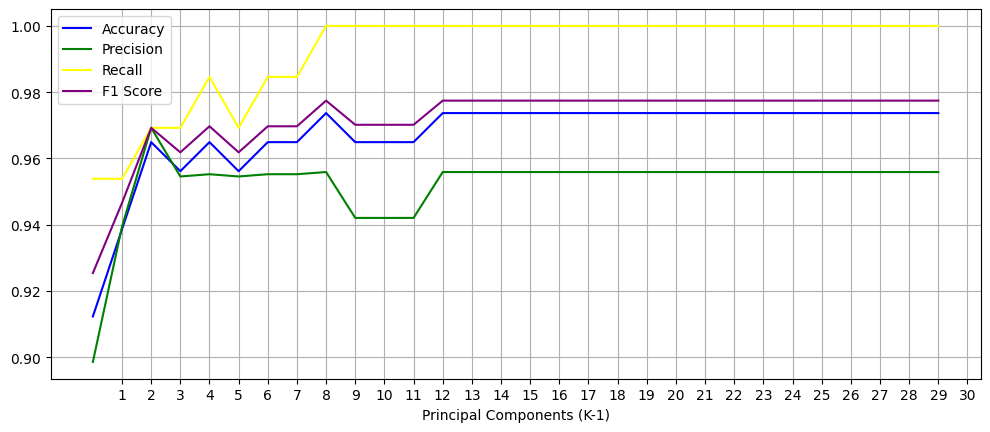

In [172]:
# plt.plot(loss, label='Loss', color='red')
plt.plot(accuracy, label='Accuracy', color='blue')
plt.plot(precision, label='Precision', color='green')
plt.plot(recall, label='Recall', color='yellow')
plt.plot(f1, label='F1 Score', color='purple')
plt.xlabel('Principal Components (K-1)')
plt.legend()
plt.xticks(range(1,31))
plt.grid(visible=True)
plt.gcf().set_size_inches(12, plt.gcf().get_size_inches()[1])
plt.show()

In [173]:
print('Scores for K=13 through K=30:')
print(f'Loss: {loss[12]}')
print(f'Accuracy: {accuracy[12]}')
print(f'Precision: {precision[12]}')
print(f'Recall: {recall[12]}')
print(f'F1 score: {f1[12]}')

Scores for K=13 through K=30:
Loss: 0.9485171944504516
Accuracy: 0.9736842105263158
Precision: 0.9558823529411765
Recall: 1.0
F1 score: 0.9774436090225563


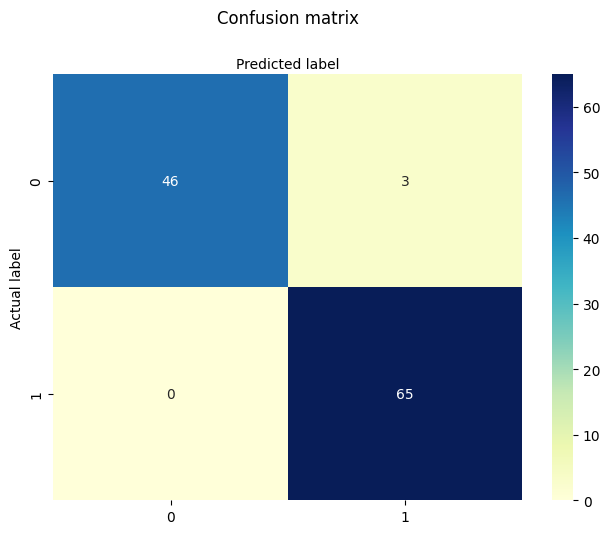

In [174]:
# confusion matrix for K=13 through K=30
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix[29]), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Problem 5: Bayes classifier with PCA

In [175]:
loss, accuracy, precision, recall, f1, cnf_matrix = ([] for i in range(6))

for k in range(1,31):
  pca = PCA(n_components=k)
  x_pca = pca.fit_transform(x)

  np.random.seed(0)
  x_train, x_test, y_train, y_test = train_test_split(x_pca, y, train_size = 0.8, test_size = 0.2, random_state = 100)

  classifier = GaussianNB()
  classifier.fit(x_train, y_train)

  y_pred = classifier.predict(x_test)
  loss.append(metrics.log_loss(y_test, y_pred))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred))
  recall.append(metrics.recall_score(y_test, y_pred))
  f1.append(metrics.f1_score(y_test, y_pred))
  cnf_matrix.append(confusion_matrix(y_test, y_pred))

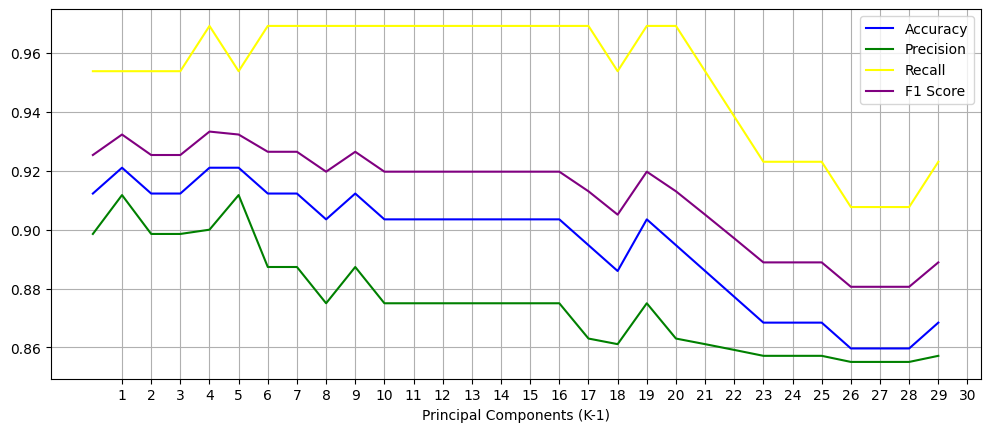

In [176]:
# plt.plot(loss, label='Loss', color='red')
plt.plot(accuracy, label='Accuracy', color='blue')
plt.plot(precision, label='Precision', color='green')
plt.plot(recall, label='Recall', color='yellow')
plt.plot(f1, label='F1 Score', color='purple')
plt.xlabel('Principal Components (K-1)')
plt.legend()
plt.xticks(range(1,31))
plt.grid(visible=True)
plt.gcf().set_size_inches(12, plt.gcf().get_size_inches()[1])
plt.show()

In [177]:
print('Scores for K=5:')
print(f'Loss: {loss[4]}')
print(f'Accuracy: {accuracy[4]}')
print(f'Precision: {precision[4]}')
print(f'Recall: {recall[4]}')
print(f'F1 score: {f1[4]}')

Scores for K=5:
Loss: 2.8455515833513543
Accuracy: 0.9210526315789473
Precision: 0.9
Recall: 0.9692307692307692
F1 score: 0.9333333333333333


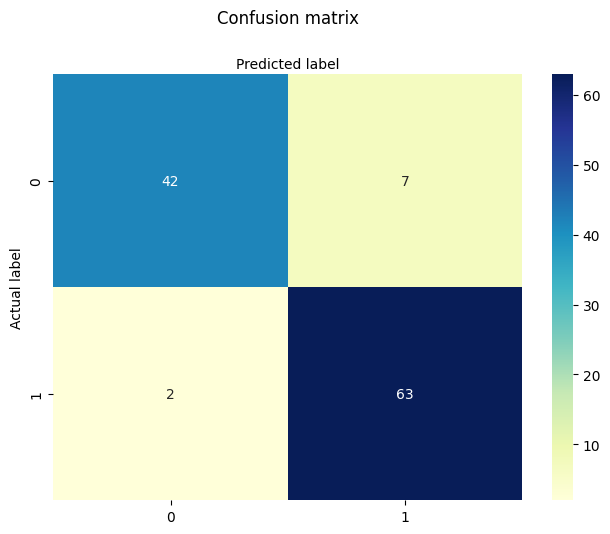

In [178]:
# confusion matrix for K=5
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix[4]), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()